In [1]:
import pandas as pd
import numpy as np
from datetime import date

In [2]:
client = pd.read_csv("ficheiros_competicao_tratados/client.csv", sep=",", na_values=["?"])
client.head()


,client_id,district_id,sex,birth_date
0,1,18,f,1970-12-13
1,2,1,m,1945-02-04
2,3,1,f,1940-10-09
3,4,5,m,1956-12-01
4,5,5,f,1960-07-03


In [3]:
collected_date = pd.to_datetime("2000-01-01", format="%Y-%m-%d")


In [4]:
def getAge(row):
    date = pd.to_datetime(row['birth_date'], format='%Y-%m-%d')
    return collected_date.year - date.year - ((collected_date.month, collected_date.day) < (date.month, date.day))

In [5]:
client['age'] = client.apply(lambda x : getAge(x), axis=1)


In [6]:
def getAgeCaterory(row):
        age = row['age']
        if age <18:
            return "-18"
        elif age >= 18 and age <= 25:
            return "18-25"
        elif age > 25 and age <= 40:
            return "25-40"
        elif age > 40 and age <= 50:
            return "40-50"
        elif age > 50 and age <= 65:
            return "25-50"
        else: 
            return ">65"


In [7]:
client['age_category'] = client.apply(lambda x : getAgeCaterory(x), axis=1)
client.head()

,client_id,district_id,sex,birth_date,age,age_category
0,1,18,f,1970-12-13,29,25-40
1,2,1,m,1945-02-04,54,25-50
2,3,1,f,1940-10-09,59,25-50
3,4,5,m,1956-12-01,43,40-50
4,5,5,f,1960-07-03,39,25-40


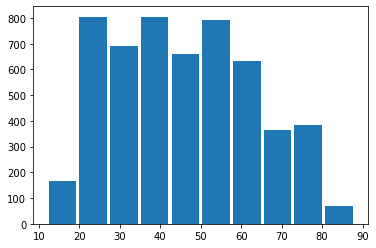

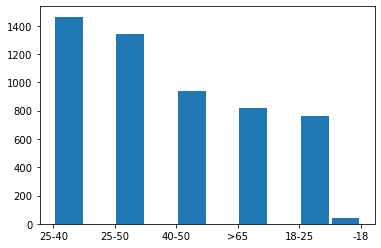

In [8]:
import matplotlib.pyplot as plt
plt.hist(client["age"], 10, rwidth=0.9)
plt.show()
plt.hist(client["age_category"], 10, rwidth=0.9)
plt.show()

In [9]:
client = client.drop(client.columns[[3]], axis=1)
client.head()

,client_id,district_id,sex,age,age_category
0,1,18,f,29,25-40
1,2,1,m,54,25-50
2,3,1,f,59,25-50
3,4,5,m,43,40-50
4,5,5,f,39,25-40


In [11]:
demographics = pd.read_csv("ficheiros_competicao_tratados/demographics.csv", sep=",", header=0)
demographics = demographics.rename(columns={"code" : "district_id"})



,client_id,district_id,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,average salary,crime_increase,unemployment_increase,crime_avg,unemployment_avg
0,1,18,f,29,25-40,70699,65.3,8968,2.4,0.52,25.81,3.09
1,420,18,m,21,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09
2,499,18,f,64,25-50,70699,65.3,8968,2.4,0.52,25.81,3.09
3,519,18,m,19,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09
4,682,18,m,20,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09


In [18]:
client_demographics = pd.merge(client, demographics, on="district_id")
client_demographics.head()

,client_id,district_id,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,average salary,crime_increase,unemployment_increase,crime_avg,unemployment_avg
0,1,18,f,29,25-40,70699,65.3,8968,2.4,0.52,25.81,3.09
1,420,18,m,21,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09
2,499,18,f,64,25-50,70699,65.3,8968,2.4,0.52,25.81,3.09
3,519,18,m,19,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09
4,682,18,m,20,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09


In [13]:
client_demographics = client_demographics.sort_values(by=['client_id'])
client_demographics.to_csv("ficheiros_competicao_tratados/client_demographics.csv", index=False, float_format="%.2f")


### Associantion between client_demo and Account ID's

In [22]:
client_acount_association = pd.read_csv("ficheiros_competicao_dev/disp.csv", sep=";", header=0)
client_acount_association.head()


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [19]:
client_card = pd.read_csv("ficheiros_competicao_dev/card_dev.csv", sep=";", header=0)
client_card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


In [23]:
disp_card = pd.merge(client_acount_association, client_card, on="disp_id")
disp_card.head()

,disp_id,client_id,account_id,type_x,card_id,type_y,issued
0,41,41,33,OWNER,3,gold,950903
1,51,51,43,OWNER,5,junior,950424
2,77,77,66,OWNER,10,classic,961207
3,83,83,71,OWNER,12,junior,960911
4,87,87,73,OWNER,13,classic,940629


In [ ]:
disp_card = disp_card.drop(['disp_id, card_id'])

Merge the two tables by client_id

In [73]:
merged_client_demo_account = pd.merge(client_acount_association, client_demographics, on= 'client_id')
merged_client_demo_account.to_csv("dados_tratados/client_demo_account.csv", index=False, float_format="%.2f")
merged_client_demo_account.head()



,disp_id,client_id,account_id,type,district_id,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,average salary,crime_increase,unemployment_increase,crime_avg,unemployment_avg
0,1,1,1,OWNER,18,f,29,25-40,70699,65.3,8968,2.40,0.52,25.81,3.09
1,2,2,2,OWNER,1,m,54,25-50,1204953,100.0,12541,11.15,0.14,76.68,0.36
2,3,3,2,DISPONENT,1,f,59,25-50,1204953,100.0,12541,11.15,0.14,76.68,0.36
3,4,4,3,OWNER,5,m,43,40-50,95616,51.4,9307,4.43,0.58,29.58,4.14
4,5,5,3,DISPONENT,5,f,39,25-40,95616,51.4,9307,4.43,0.58,29.58,4.14


### Merge the Loan table and the table with all the client Info


In [74]:
loan = pd.read_csv("dados/loan_dev.csv", sep=";", header=0)
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


In [75]:
predeiction_table = pd.merge(merged_client_demo_account, loan, on= 'account_id')
predeiction_table.to_csv("dados_tratados/prediction_table.csv", index=False, float_format="%.2f")
predeiction_table.head()


,disp_id,client_id,account_id,type,district_id,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,...,crime_increase,unemployment_increase,crime_avg,unemployment_avg,loan_id,date,amount,duration,payments,status
0,2,2,2,OWNER,1,m,54,25-50,1204953,100.0,...,11.15,0.14,76.68,0.36,4959,940105,80952,24,3373,1
1,3,3,2,DISPONENT,1,f,59,25-50,1204953,100.0,...,11.15,0.14,76.68,0.36,4959,940105,80952,24,3373,1
2,25,25,19,OWNER,21,f,60,25-50,103347,67.0,...,0.53,0.56,22.51,1.79,4961,960429,30276,12,2523,-1
3,78,78,67,OWNER,16,f,55,25-50,93931,56.9,...,0.42,0.42,20.16,1.33,4973,960502,165960,24,6915,1
4,158,158,132,OWNER,40,f,54,25-50,128118,85.3,...,-0.60,0.58,53.94,6.78,4996,961106,88440,12,7370,1
